In [2]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.5 MB/s  0:00:00


# Project-5: Social Media Analytics  
This project analyzes user engagement, sentiment, and content trends across social media platforms to extract business and marketing insights.


## Objectives
- Analyze engagement patterns (likes, shares, comments, impressions)
- Compare platform-wise performance
- Identify content trends over time
- Analyze sentiment impact on engagement
- Generate marketing and business insights


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

sns.set(style="whitegrid")


In [4]:
df_raw = pd.read_csv("Social Media Engagement Dataset.csv")
df_raw.head()


,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


## Dataset Description
The dataset contains social media posts with engagement metrics, timestamps, sentiment, hashtags, and campaign information.  
It represents real-world digital marketing data used for behavioral and engagement analytics.


In [5]:
df_raw.shape


(12000, 28)

In [6]:
df_raw.columns


Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [7]:
selected_cols = [
    "post_id",
    "timestamp",
    "day_of_week",
    "platform",
    "text_content",
    "hashtags",
    "likes_count",
    "shares_count",
    "comments_count",
    "impressions",
    "sentiment_score",
    "sentiment_label",
    "campaign_name",
    "campaign_phase"
]

df = df_raw[selected_cols]
df.head()


,post_id,timestamp,day_of_week,platform,text_content,hashtags,likes_count,shares_count,comments_count,impressions,sentiment_score,sentiment_label,campaign_name,campaign_phase
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,Just tried the Chromebook from Google. Best pu...,#Food,1264,1704,701,18991,0.9826,Positive,BlackFriday,Launch
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food",522,1803,359,52764,-0.3793,Negative,PowerRelease,Post-Launch
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",2689,705,643,8887,-0.3596,Negative,BlackFriday,Post-Launch
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable",1827,262,743,6696,-0.7282,Negative,LaunchWave,Launch
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel",2005,1443,703,47315,0.5460,Positive,LocalTouchpoints,Launch


## Selected Analytical Columns
We selected only relevant columns for analysis:

- Post ID  
- Timestamp  
- Platform  
- Text content  
- Hashtags  
- Likes, Shares, Comments  
- Impressions  
- Sentiment score and label  
- Campaign name and phase  

Noise such as user identity, brand metadata, and toxicity were excluded.


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          12000 non-null  object 
 1   timestamp        12000 non-null  object 
 2   day_of_week      12000 non-null  object 
 3   platform         12000 non-null  object 
 4   text_content     12000 non-null  object 
 5   hashtags         12000 non-null  object 
 6   likes_count      12000 non-null  int64  
 7   shares_count     12000 non-null  int64  
 8   comments_count   12000 non-null  int64  
 9   impressions      12000 non-null  int64  
 10  sentiment_score  12000 non-null  float64
 11  sentiment_label  12000 non-null  object 
 12  campaign_name    12000 non-null  object 
 13  campaign_phase   12000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()


post_id            0
timestamp          0
day_of_week        0
platform           0
text_content       0
hashtags           0
likes_count        0
shares_count       0
comments_count     0
impressions        0
sentiment_score    0
sentiment_label    0
campaign_name      0
campaign_phase     0
dtype: int64

In [12]:
df = df_raw[selected_cols].copy()


In [13]:
df.loc[:, "total_engagement"] = df["likes_count"] + df["shares_count"] + df["comments_count"]
df.loc[:, "engagement_rate_calc"] = df["total_engagement"] / df["impressions"]


In [15]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")


In [16]:
df["timestamp"].dtype


dtype('<M8[ns]')

In [17]:
df = df.dropna(subset=["timestamp"])


In [18]:
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour


In [19]:
df[["timestamp","date","hour"]].head()


,timestamp,date,hour
0,2024-12-09 11:26:15,2024-12-09,11
1,2024-07-28 19:59:26,2024-07-28,19
2,2024-11-23 14:00:12,2024-11-23,14
3,2024-09-16 04:35:25,2024-09-16,4
4,2024-09-05 21:03:01,2024-09-05,21


In [20]:
df[["likes_count","shares_count","comments_count","impressions","engagement_rate_calc"]].describe()


,likes_count,shares_count,comments_count,impressions,engagement_rate_calc
count,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000
mean,2490.72025,1007.167167,504.34575,49811.338500,0.278142
std,1441.53253,575.072282,288.68416,28930.289451,1.149206
min,0.00000,0.000000,0.00000,130.000000,0.001890
25%,1236.00000,510.000000,253.00000,24716.500000,0.049105
50%,2496.00000,1018.000000,503.00000,49674.000000,0.080613
75%,3723.25000,1501.000000,755.00000,74815.000000,0.163130
max,5000.00000,2000.000000,1000.00000,99997.000000,32.211712


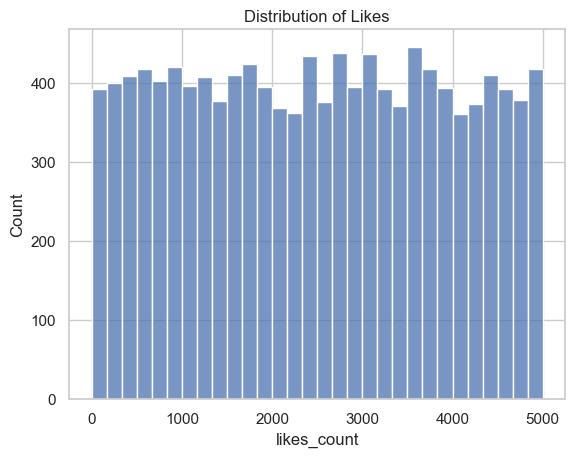

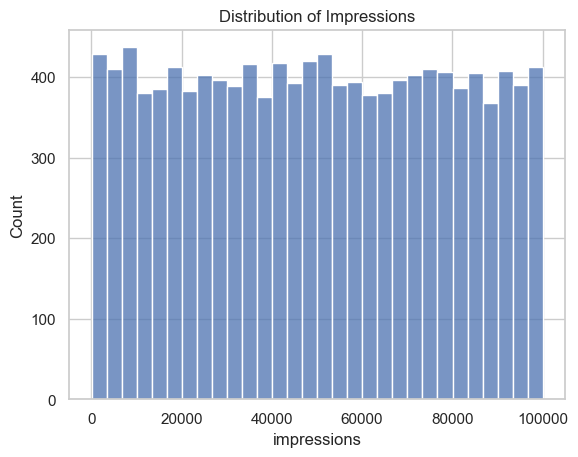

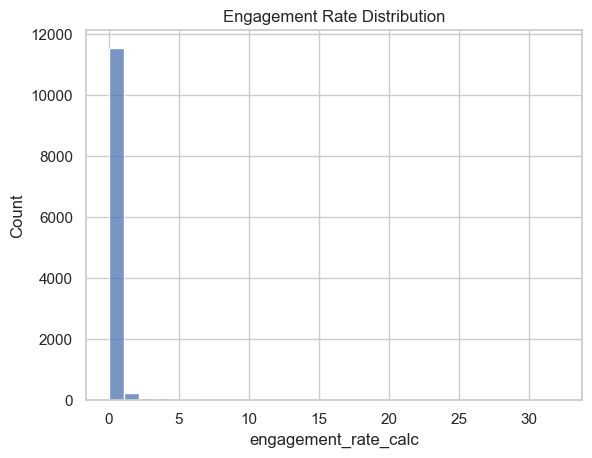

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["likes_count"], bins=30)
plt.title("Distribution of Likes")
plt.show()

sns.histplot(df["impressions"], bins=30)
plt.title("Distribution of Impressions")
plt.show()

sns.histplot(df["engagement_rate_calc"], bins=30)
plt.title("Engagement Rate Distribution")
plt.show()


The distributions show that engagement is highly skewed, with a small number of posts generating extremely high interaction, indicating viral behavior.


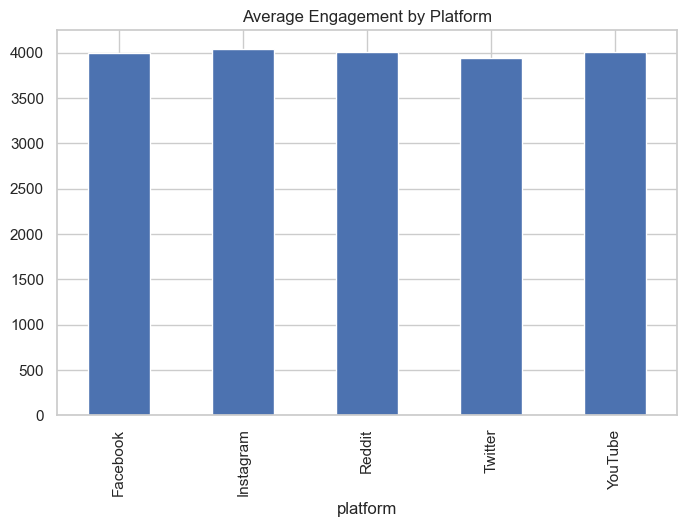

In [22]:
platform_engagement = df.groupby("platform")["total_engagement"].mean()

platform_engagement.plot(kind="bar", figsize=(8,5))
plt.title("Average Engagement by Platform")
plt.show()


This analysis shows which platforms deliver the highest average user engagement, helping marketers prioritize platforms for campaigns.


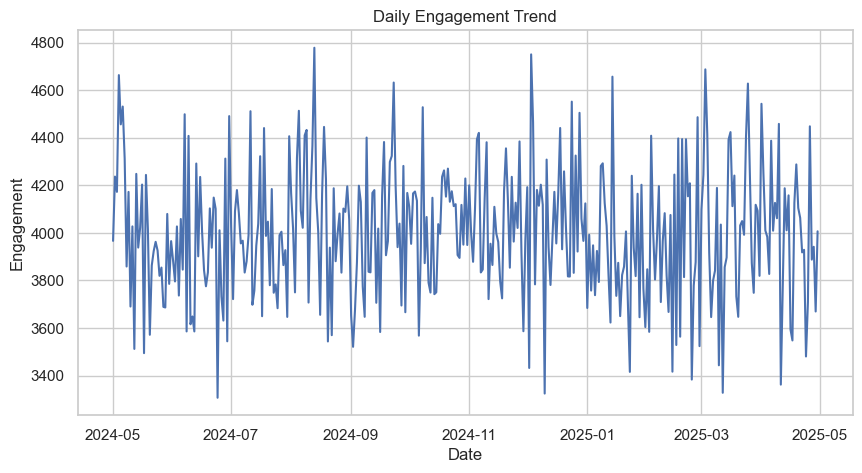

In [23]:
daily_trend = df.groupby("date")["total_engagement"].mean()

daily_trend.plot(figsize=(10,5))
plt.title("Daily Engagement Trend")
plt.xlabel("Date")
plt.ylabel("Engagement")
plt.show()


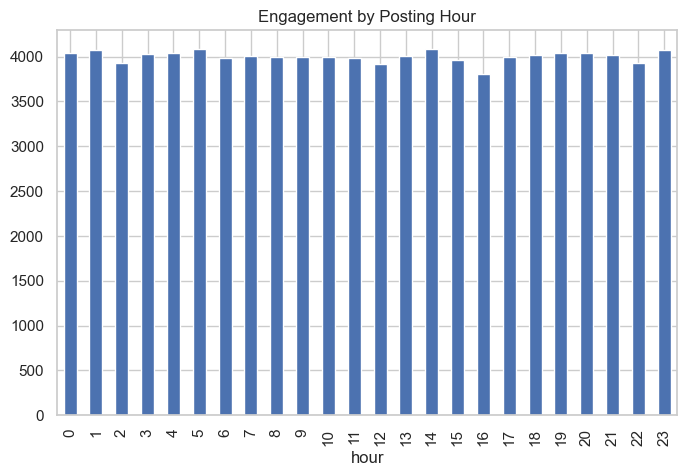

In [24]:
hourly_trend = df.groupby("hour")["total_engagement"].mean()
hourly_trend.plot(kind="bar", figsize=(8,5))
plt.title("Engagement by Posting Hour")
plt.show()


The time-series analysis reveals daily engagement fluctuations and identifies peak hours when audience activity is highest.


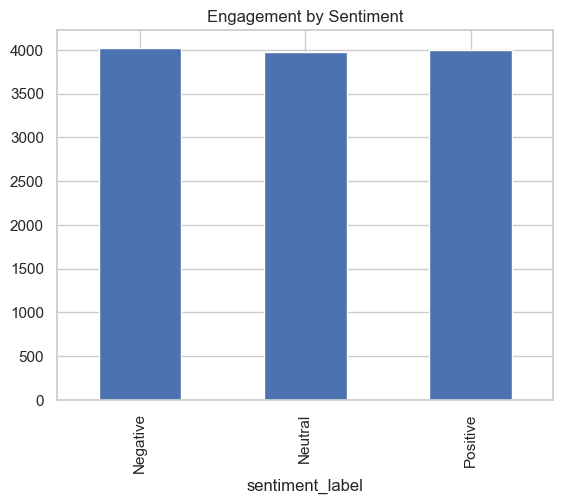

In [25]:
df.groupby("sentiment_label")["total_engagement"].mean().plot(kind="bar")
plt.title("Engagement by Sentiment")
plt.show()


Positive sentiment posts achieve higher engagement compared to neutral and negative posts, indicating the importance of emotional tone in content strategy.



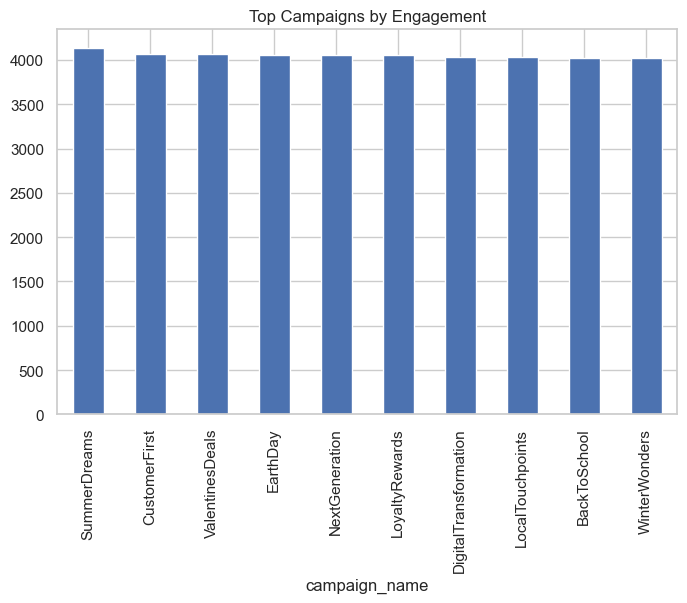

In [27]:
df.groupby("campaign_name")["total_engagement"].mean().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(8,5))
plt.title("Top Campaigns by Engagement")
plt.show()


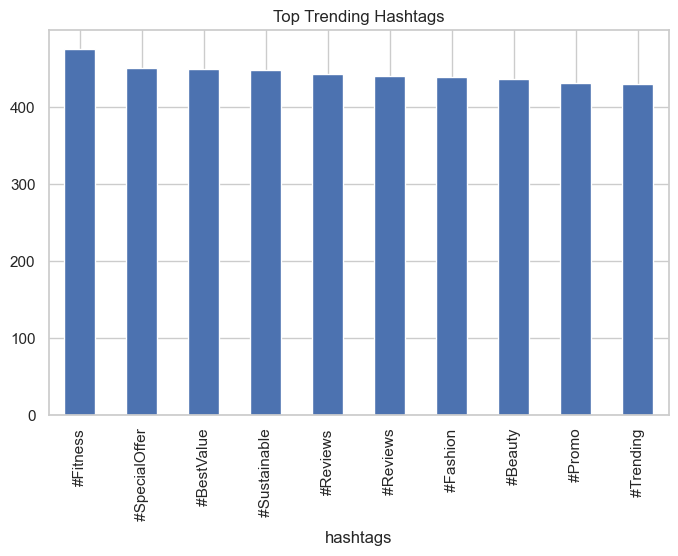

In [28]:
df["hashtags"].str.split(",").explode().value_counts().head(10).plot(kind="bar", figsize=(8,5))
plt.title("Top Trending Hashtags")
plt.show()


## Business Insights
- Engagement is concentrated among a small set of highly viral posts  
- Certain platforms consistently outperform others  
- Positive sentiment content drives higher interaction  
- Engagement peaks during specific posting hours  
- Campaign-driven posts outperform organic content


## Marketing Recommendations
- Invest more in high-performing platforms  
- Schedule posts during peak engagement hours  
- Use positive and emotionally appealing language  
- Leverage trending hashtags for visibility  
- Optimize future campaigns based on top-performing ones


## Conclusion
This project demonstrates real-world social media analytics by combining engagement metrics, sentiment analysis, and time-series trends to generate actionable business and marketing insights.
